<center>
    <h1> 
        Teste de Hipótese 1.1: Tentando Melhorar o Contraste de Imagens Coloridas 
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

O Teste 1 foi feito para verificar se é possível diferenciar documentos pelos seus canais de cores para do desafio 1 do Mandacaru.dev. Os documentos possuem diferentes canais de cores, entretanto, o histogram das fotos com pouco contrasnte se distanciam das com bom constrate, atrapalhando a sua classificação. Nesse teste, será verificado a possibilidade de melhorar o constrate dessas fotos para viabilizat a classificação dos documentos através dos canais de cores.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Comparação entre uma amostra boa e outra ruim <br>
2. Equalização Global <br>
3. CLAHE (Contrast Limited Adaptive Histogram Equalization) <br>

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# 1. Comparação entre uma amostra boa e outra ruim

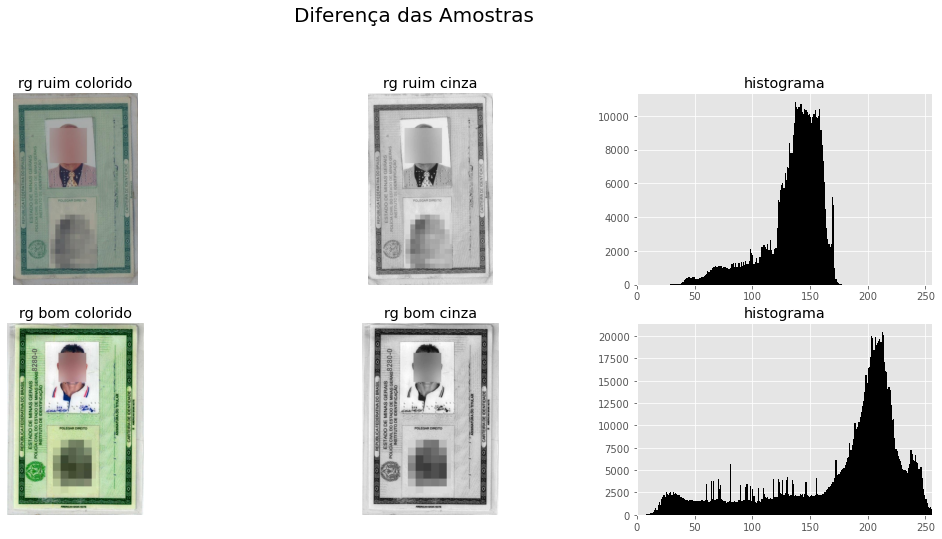

In [3]:
rg_ruim = cv2.cvtColor(cv2.imread('imagens_originais/rg_frente_2.jpg'), cv2.COLOR_BGR2RGB)
rg_ruim_cinza = cv2.cvtColor(rg_ruim, cv2.COLOR_RGB2GRAY)

rg_bom = cv2.cvtColor(cv2.imread('imagens_originais/rg_frente.jpg'), cv2.COLOR_BGR2RGB)
rg_bom_cinza = cv2.cvtColor(rg_bom, cv2.COLOR_RGB2GRAY)


fig = plt.figure(figsize=(18,12))

fig.add_subplot(3,3,1); plt.axis('off')
plt.title('rg ruim colorido')
plt.imshow(rg_ruim)

fig.add_subplot(3,3,2); plt.axis('off')
plt.title('rg ruim cinza')
plt.imshow(rg_ruim_cinza, cmap='gray')

fig.add_subplot(3,3,3)
plt.hist(rg_ruim_cinza.flatten(),256,[0,256], color = 'black')
plt.title('histograma')
plt.xlim([0,256])

fig.add_subplot(3,3,4); plt.axis('off')
plt.title('rg bom colorido')
plt.imshow(rg_bom)

fig.add_subplot(3,3,5); plt.axis('off')
plt.title('rg bom cinza')
plt.imshow(rg_bom_cinza, cmap='gray')

fig.add_subplot(3,3,6)
plt.hist(rg_bom_cinza.flatten(),256,[0,256], color = 'black')
plt.title('histograma')
plt.xlim([0,256])

fig.suptitle('Diferença das Amostras', fontsize=20)
plt.show();

# 2. Equalização Global

In [4]:
def histogram_equalize(img):
    r, g, b = cv2.split(img)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    return cv2.merge((red, green, blue))

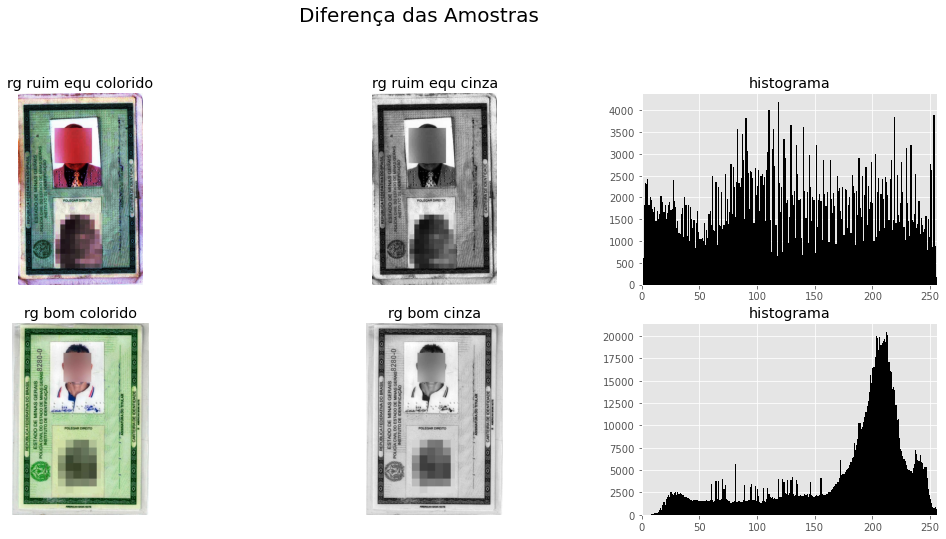

In [5]:
rg_ruim_color = histogram_equalize(rg_ruim)
rg_ruim_equ = cv2.cvtColor(rg_ruim_color, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(18,12))

fig.add_subplot(3,3,1); plt.axis('off')
plt.title('rg ruim equ colorido')
plt.imshow(rg_ruim_color)

fig.add_subplot(3,3,2); plt.axis('off')
plt.title('rg ruim equ cinza')
plt.imshow(rg_ruim_equ, cmap='gray')

fig.add_subplot(3,3,3)
plt.hist(rg_ruim_equ.flatten(),256,[0,256], color = 'black')
plt.title('histograma')
plt.xlim([0,256])

fig.add_subplot(3,3,4); plt.axis('off')
plt.title('rg bom colorido')
plt.imshow(rg_bom)

fig.add_subplot(3,3,5); plt.axis('off')
plt.title('rg bom cinza')
plt.imshow(rg_bom_cinza, cmap='gray')

fig.add_subplot(3,3,6)
plt.hist(rg_bom_cinza.flatten(),256,[0,256], color = 'black')
plt.title('histograma')
plt.xlim([0,256])

fig.suptitle('Diferença das Amostras', fontsize=20)
plt.show();

In [6]:
documentos = {
    'rg_ruim' : {'matriz' : rg_ruim},
    'rg_ruim_equ': {'matriz' : rg_ruim_color},
    'rg_bom' : {'matriz' : rg_bom}
}

In [7]:
for key, value in documentos.items():
    documentos[key]['hist_red'] = cv2.calcHist(documentos[key]['matriz'],[0],None,[256],[0,256])
    documentos[key]['hist_green'] = cv2.calcHist(documentos[key]['matriz'],[1],None,[256],[0,256])
    documentos[key]['hist_blue'] = cv2.calcHist(documentos[key]['matriz'],[2],None,[256],[0,256])

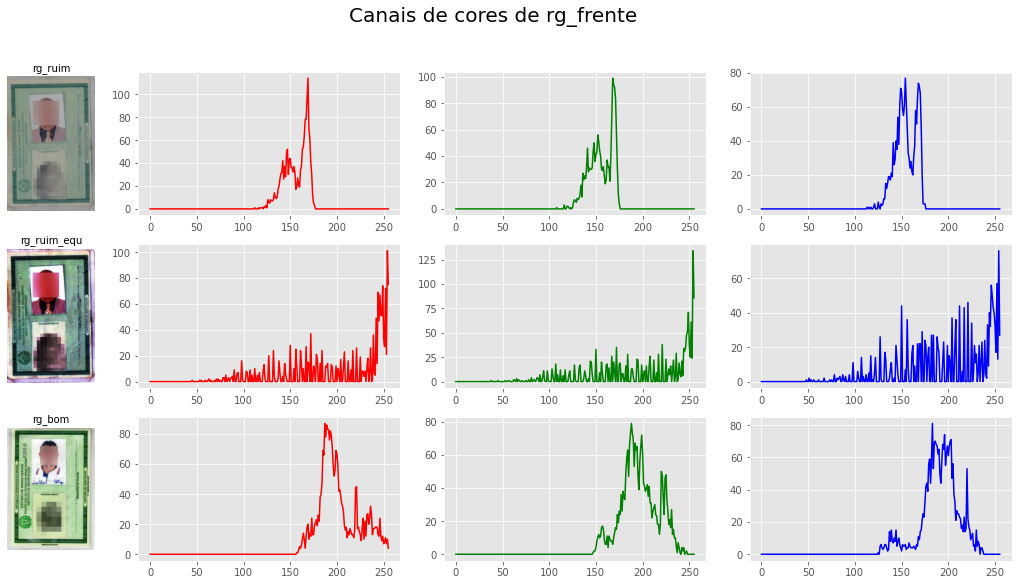

In [8]:
n = len(documentos.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in documentos.items():
    ax[0+(cont)].imshow(value['matriz']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canais de cores de rg_frente', fontsize=20)
plt.show()

# 3. CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [9]:
def clahe_func(img):
    r, g, b = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    red = clahe.apply(r)
    green = clahe.apply(g)
    blue = clahe.apply(b)
    return cv2.merge((red, green, blue))

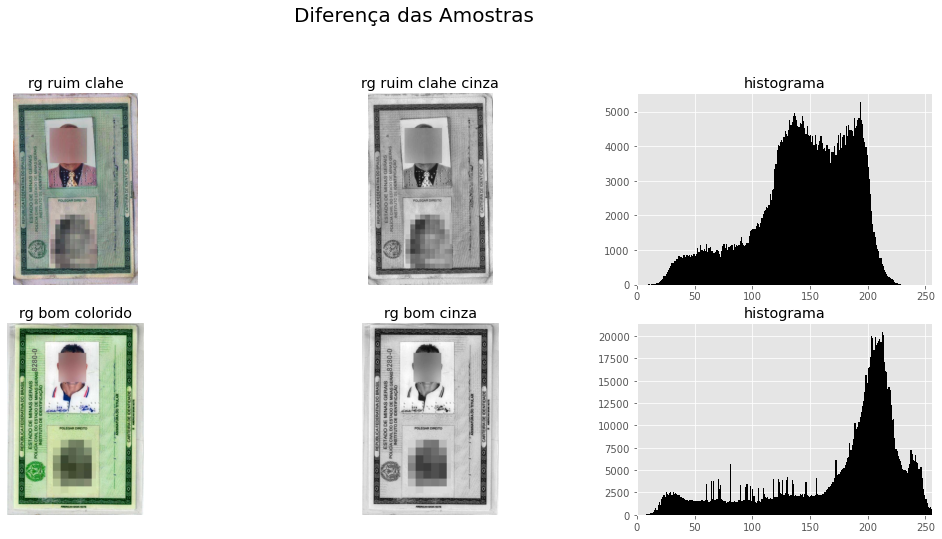

In [10]:
rg_ruim_clahe = clahe_func(rg_ruim)
rg_clahe_cinza = cv2.cvtColor(rg_ruim_clahe, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(18,12))

fig.add_subplot(3,3,1); plt.axis('off')
plt.title('rg ruim clahe')
plt.imshow(rg_ruim_clahe)

fig.add_subplot(3,3,2); plt.axis('off')
plt.title('rg ruim clahe cinza')
plt.imshow(rg_clahe_cinza, cmap='gray')

fig.add_subplot(3,3,3)
plt.hist(rg_clahe_cinza.flatten(),256,[0,256], color = 'black')
plt.title('histograma')
plt.xlim([0,256])

fig.add_subplot(3,3,4); plt.axis('off')
plt.title('rg bom colorido')
plt.imshow(rg_bom)

fig.add_subplot(3,3,5); plt.axis('off')
plt.title('rg bom cinza')
plt.imshow(rg_bom_cinza, cmap='gray')

fig.add_subplot(3,3,6)
plt.hist(rg_bom_cinza.flatten(),256,[0,256], color = 'black')
plt.title('histograma')
plt.xlim([0,256])

fig.suptitle('Diferença das Amostras', fontsize=20)
plt.show();

In [11]:
documentos = {
    'rg_ruim' : {'matriz' : rg_ruim},
    'rg_ruim_clahe': {'matriz' : rg_ruim_clahe},
    'rg_bom' : {'matriz' : rg_bom}
}

In [12]:
for key, value in documentos.items():
    documentos[key]['hist_red'] = cv2.calcHist(documentos[key]['matriz'],[0],None,[256],[0,256])
    documentos[key]['hist_green'] = cv2.calcHist(documentos[key]['matriz'],[1],None,[256],[0,256])
    documentos[key]['hist_blue'] = cv2.calcHist(documentos[key]['matriz'],[2],None,[256],[0,256])

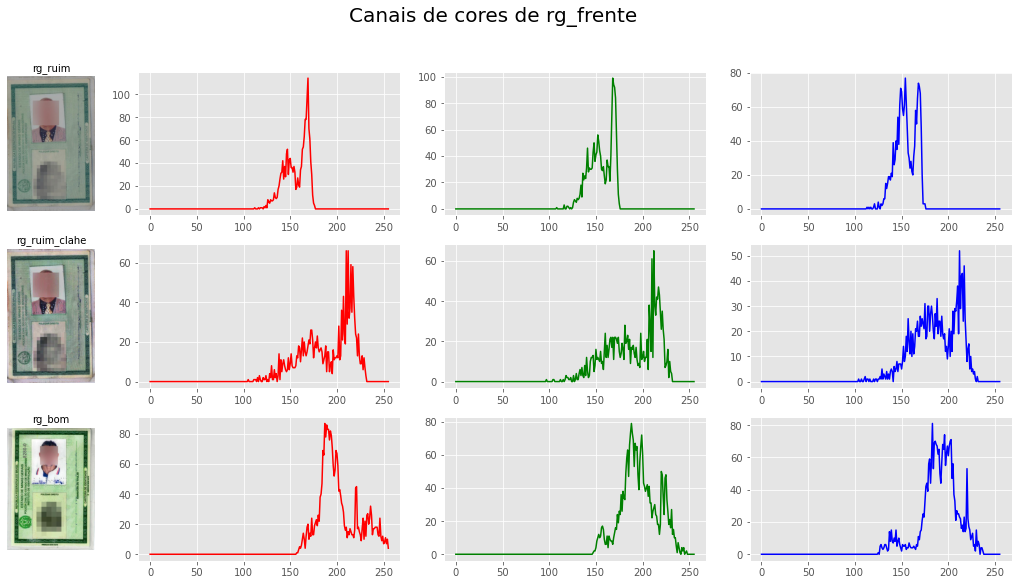

In [13]:
n = len(documentos.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in documentos.items():
    ax[0+(cont)].imshow(value['matriz']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canais de cores de rg_frente', fontsize=20)
plt.show()

hist = cv2.calcHist([rg_bom_cinza],[0],None,[256],[0,256])
plt.plot(hist, color='black');